In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Resize to meet Xception input requirement
x_train = tf.image.resize(x_train, (75, 75))
x_test = tf.image.resize(x_test, (75, 75))

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
base_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(75, 75, 3),
    pooling="avg"
)
base_model.trainable = False  # Freeze base model

input_layer = layers.Input(shape=(75, 75, 3))
x = base_model(input_layer, training=False)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,388,594 (81.59 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    shuffle=True,
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.6053 - loss: 1.1945 - val_accuracy: 0.7147 - val_loss: 0.8208
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7110 - loss: 0.8446 - val_accuracy: 0.7261 - val_loss: 0.7739
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7311 - loss: 0.7679 - val_accuracy: 0.7359 - val_loss: 0.7587
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7483 - loss: 0.7236 - val_accuracy: 0.7402 - val_loss: 0.7493
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7632 - loss: 0.6800 - val_accuracy: 0.7400 - val_loss: 0.7500
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7771 - loss: 0.6305 - val_accuracy: 0.7436 - val_loss: 0.7445
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7793 - loss: 0.6142 - val_accuracy: 0.7432 - val_loss: 0.7473
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.7912 - loss: 0.5823 - 

In [ ]:
base_model.trainable = True
opt_fine = optimizers.Adam(learning_rate=1e-5)

model.compile(
    loss="categorical_crossentropy",
    optimizer=opt_fine,
    metrics=["accuracy"]
)

history_fine = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
    shuffle=True,
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 153ms/step - accuracy: 0.9442 - loss: 0.1600 - val_accuracy: 0.8811 - val_loss: 0.4013
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.9580 - loss: 0.1197 - val_accuracy: 0.8863 - val_loss: 0.4038
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 130ms/step - accuracy: 0.9686 - loss: 0.0946 - val_accuracy: 0.8860 - val_loss: 0.4225


In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=1000)
print(f"Test Accuracy (from model.evaluate): {acc * 100:.2f}%")

# Manual accuracy
actual_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(model.predict(x_test), axis=1)
manual_accuracy = np.mean(actual_labels == predicted_labels)
print(f"Actual Accuracy (manual calculation): {manual_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 606ms/step - accuracy: 0.8818 - loss: 0.4028
Test Accuracy (from model.evaluate): 88.11%
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step
Actual Accuracy (manual calculation): 88.11%


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


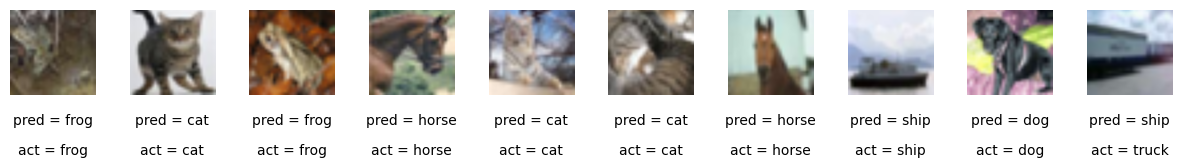

In [ ]:
CLASSES = np.array([
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx].numpy()
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred = " + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, "act = " + str(actual_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(img)
plt.show()